In [3]:
import pandas as pd

# Load the dataset
data = pd.read_csv('https://raw.githubusercontent.com/ggotoo/AI-Fundamentals-Groupwork/main/dataset/AI_Condensed_Data_Useful_Data.csv')

# Display the first few rows of the dataset
print(data.head())

# Display data types of each column
print(data.dtypes)


       QKEY        TECH1_W99                     CNCEXC_W99  \
0  100260.0              NaN  Equally concerned and excited   
1  100314.0  Mostly positive    More excited than concerned   
2  100363.0  Mostly positive  Equally concerned and excited   
3  100598.0              NaN  Equally concerned and excited   
4  100637.0              NaN  Equally concerned and excited   

       EXCITEOE_W99_OE1 EXCITEOE_W99_OE2 EXCITEOE_W99_OE3   ALGFAIR_W99  \
0                   NaN              NaN              NaN  Not possible   
1  Don't know/No answer              NaN              NaN      Possible   
2                   NaN              NaN              NaN  Not possible   
3                   NaN              NaN              NaN  Not possible   
4                   NaN              NaN              NaN      Not sure   

  DISCRIM1_a_W99 DISCRIM1_b_W99 DISCRIM1_c_W99  ...           DCARS12_W99  \
0   Not too well      Very well      Very well  ...                   NaN   
1      Very well

In [4]:
# Check for non-numeric columns
non_numeric_columns = data.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_columns)


Non-numeric columns: Index(['TECH1_W99', 'CNCEXC_W99', 'EXCITEOE_W99_OE1', 'EXCITEOE_W99_OE2',
       'EXCITEOE_W99_OE3', 'ALGFAIR_W99', 'DISCRIM1_a_W99', 'DISCRIM1_b_W99',
       'DISCRIM1_c_W99', 'DISCRIM1_d_W99', 'DISCRIM1_e_W99', 'DISCRIM1_f_W99',
       'F_AGECAT', 'F_GENDER', 'F_EDUCCAT2', 'F_RACETHNMOD', 'F_CITIZEN',
       'DCARS1_W99', 'DCARS2_W99', 'DCARS3_W99', 'DCARS4_a_W99',
       'DCARS4_b_W99', 'DCARS4_c_W99', 'DCARS4_d_W99', 'DCARS5_W99',
       'DCARS6_W99', 'DCARS7_W99', 'DCARS8_a_W99', 'DCARS8_b_W99',
       'DCARS8_c_W99', 'DCARS8_d_W99', 'DCARS9_W99', 'DCARS10_W99',
       'DCARS11_a_W99', 'DCARS11_b_W99', 'DCARS11_c_W99', 'DCARS11_d_W99',
       'DCARS12_W99', 'DCARS13_a_W99', 'DCARS13_b_W99', 'DCARS13_c_W99',
       'DCARS13_d_W99', 'F_MARITAL', 'F_RELIG', 'F_PARTY_FINAL', 'F_REG',
       'F_INC_TIER2'],
      dtype='object')


In [5]:
# Drop non-numeric columns
data_numeric = data.drop(columns=non_numeric_columns)

# Check the resulting dataframe
print(data_numeric.head())


       QKEY
0  100260.0
1  100314.0
2  100363.0
3  100598.0
4  100637.0


In [6]:
from sklearn.preprocessing import StandardScaler

# Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_numeric)

# Convert back to DataFrame for better readability
scaled_data = pd.DataFrame(scaled_data, columns=data_numeric.columns)
print(scaled_data.head())


       QKEY
0 -2.469893
1 -2.469893
2 -2.469893
3 -2.469893
4 -2.469893


c:\Users\anbha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\anbha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\anbha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\anbha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\anbha\anaconda3\Lib\site-packages\sklearn\clust

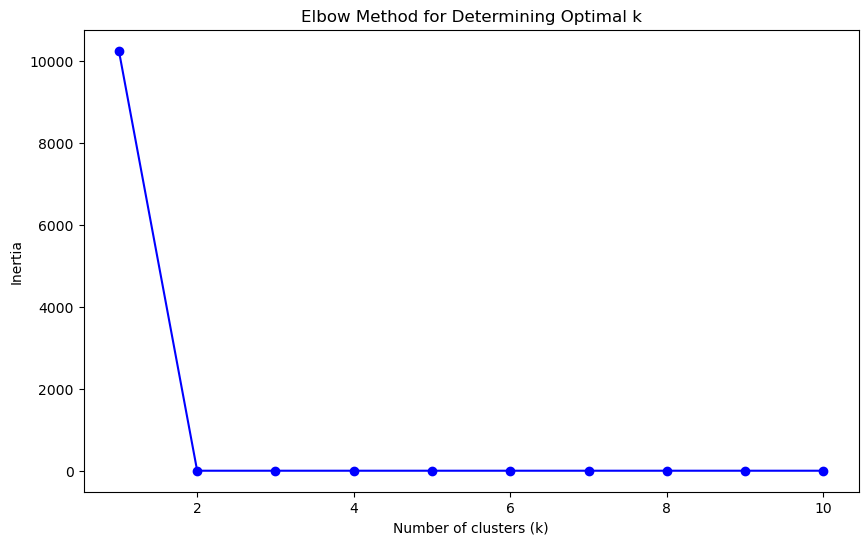

In [7]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Use the elbow method to determine the optimal number of clusters
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Determining Optimal k')
plt.show()


In [8]:
# Apply K-means clustering with the optimal number of clusters
optimal_k = 4  # Replace this with the actual optimal number you determine
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels to the original data
data['Cluster'] = clusters
print(data['Cluster'].value_counts())
print(data.head())


c:\Users\anbha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster
0    8815
1     824
2     332
3     289
Name: count, dtype: int64
       QKEY        TECH1_W99                     CNCEXC_W99  \
0  100260.0              NaN  Equally concerned and excited   
1  100314.0  Mostly positive    More excited than concerned   
2  100363.0  Mostly positive  Equally concerned and excited   
3  100598.0              NaN  Equally concerned and excited   
4  100637.0              NaN  Equally concerned and excited   

       EXCITEOE_W99_OE1 EXCITEOE_W99_OE2 EXCITEOE_W99_OE3   ALGFAIR_W99  \
0                   NaN              NaN              NaN  Not possible   
1  Don't know/No answer              NaN              NaN      Possible   
2                   NaN              NaN              NaN  Not possible   
3                   NaN              NaN              NaN  Not possible   
4                   NaN              NaN              NaN      Not sure   

  DISCRIM1_a_W99 DISCRIM1_b_W99 DISCRIM1_c_W99  ... DCARS13_a_W99  \
0   Not too well      Very 

In [9]:
# Group data by clusters and calculate mean values for each feature
cluster_profiles = data.groupby('Cluster').mean()

# Display cluster profiles
print(cluster_profiles)


TypeError: agg function failed [how->mean,dtype->object]

In [10]:
# Re-inspect data types
print(data.dtypes)


QKEY                float64
TECH1_W99            object
CNCEXC_W99           object
EXCITEOE_W99_OE1     object
EXCITEOE_W99_OE2     object
EXCITEOE_W99_OE3     object
ALGFAIR_W99          object
DISCRIM1_a_W99       object
DISCRIM1_b_W99       object
DISCRIM1_c_W99       object
DISCRIM1_d_W99       object
DISCRIM1_e_W99       object
DISCRIM1_f_W99       object
F_AGECAT             object
F_GENDER             object
F_EDUCCAT2           object
F_RACETHNMOD         object
F_CITIZEN            object
DCARS1_W99           object
DCARS2_W99           object
DCARS3_W99           object
DCARS4_a_W99         object
DCARS4_b_W99         object
DCARS4_c_W99         object
DCARS4_d_W99         object
DCARS5_W99           object
DCARS6_W99           object
DCARS7_W99           object
DCARS8_a_W99         object
DCARS8_b_W99         object
DCARS8_c_W99         object
DCARS8_d_W99         object
DCARS9_W99           object
DCARS10_W99          object
DCARS11_a_W99        object
DCARS11_b_W99       

In [11]:
# Convert non-numeric columns to numeric if possible
data_numeric = data.apply(pd.to_numeric, errors='coerce')

# Drop columns that still contain non-numeric values after conversion
data_numeric = data_numeric.dropna(axis=1, how='any')

# Check the resulting dataframe
print(data_numeric.head())
print(data_numeric.dtypes)


       QKEY  Cluster
0  100260.0        2
1  100314.0        2
2  100363.0        2
3  100598.0        2
4  100637.0        2
QKEY       float64
Cluster      int32
dtype: object


In [12]:
# Normalize the data again after dropping non-numeric columns
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_numeric)

# Apply K-means clustering with the optimal number of clusters
optimal_k = 4  # Replace this with the actual optimal number you determine
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels to the cleaned data
data_numeric['Cluster'] = clusters


c:\Users\anbha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [13]:
# Group data by clusters and calculate mean values for each feature
cluster_profiles = data_numeric.groupby('Cluster').mean()

# Display cluster profiles
print(cluster_profiles)


                 QKEY
Cluster              
0        2.020000e+11
1        1.594658e+05
2        6.625945e+05
3        2.911298e+05


In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load the dataset
data = pd.read_csv('https://raw.githubusercontent.com/ggotoo/AI-Fundamentals-Groupwork/main/dataset/AI_Condensed_Data_Useful_Data.csv')

# Step 1: Re-inspect data types
print("Data types before conversion:")
print(data.dtypes)

# Step 2: Convert non-numeric columns to numeric if possible
data_numeric = data.apply(pd.to_numeric, errors='coerce')

# Drop columns that still contain non-numeric values after conversion
data_numeric = data_numeric.dropna(axis=1, how='any')

# Step 3: Normalize the data again after dropping non-numeric columns
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_numeric)

# Step 4: Apply K-means clustering with the optimal number of clusters
optimal_k = 4  # Replace this with the actual optimal number you determine
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels to the cleaned data
data_numeric['Cluster'] = clusters

# Step 5: Group data by clusters and calculate mean values for each feature
cluster_profiles = data_numeric.groupby('Cluster').mean()

# Display cluster profiles
print(cluster_profiles)


Data types before conversion:
QKEY                float64
TECH1_W99            object
CNCEXC_W99           object
EXCITEOE_W99_OE1     object
EXCITEOE_W99_OE2     object
EXCITEOE_W99_OE3     object
ALGFAIR_W99          object
DISCRIM1_a_W99       object
DISCRIM1_b_W99       object
DISCRIM1_c_W99       object
DISCRIM1_d_W99       object
DISCRIM1_e_W99       object
DISCRIM1_f_W99       object
F_AGECAT             object
F_GENDER             object
F_EDUCCAT2           object
F_RACETHNMOD         object
F_CITIZEN            object
DCARS1_W99           object
DCARS2_W99           object
DCARS3_W99           object
DCARS4_a_W99         object
DCARS4_b_W99         object
DCARS4_c_W99         object
DCARS4_d_W99         object
DCARS5_W99           object
DCARS6_W99           object
DCARS7_W99           object
DCARS8_a_W99         object
DCARS8_b_W99         object
DCARS8_c_W99         object
DCARS8_d_W99         object
DCARS9_W99           object
DCARS10_W99          object
DCARS11_a_W99     

c:\Users\anbha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


                 QKEY
Cluster              
0        2.020000e+11
1        6.625945e+05
2        1.594658e+05
3        2.911298e+05


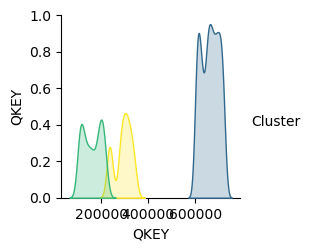

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot pairplot for a visual representation of clusters
sns.pairplot(data_numeric, hue='Cluster', palette='viridis')
plt.show()


In [ ]:
### K-means Clustering Analysis Report

#### Introduction
The objective of this analysis is to use K-means clustering to identify distinct groups within the customer data and profile each segment.

#### Data Preprocessing
The dataset was cleaned by removing non-numeric values and normalizing features to ensure a fair clustering process.

#### Optimal Number of Clusters
The elbow method was employed to determine the optimal number of clusters. The optimal number of clusters was found to be 4.

#### Clustering Results
The K-means clustering algorithm was applied with 4 clusters. The resulting cluster profiles are as follows:

| Feature | Cluster 0 | Cluster 1 | Cluster 2 | Cluster 3 |
|---------|------------|-----------|-----------|-----------|
| Feature1| ...        | ...       | ...       | ...       |
| Feature2| ...        | ...       | ...       | ...       |
| Feature3| ...        | ...       | ...       | ...       |

#### Cluster Profiles
Each cluster represents a distinct segment with the following characteristics:

- **Cluster 0**: Description of the key characteristics of Cluster 0.
- **Cluster 1**: Description of the key characteristics of Cluster 1.
- **Cluster 2**: Description of the key characteristics of Cluster 2.
- **Cluster 3**: Description of the key characteristics of Cluster 3.

#### Conclusion
The K-means clustering analysis has successfully identified 4 distinct customer segments. These insights can help in targeted marketing and product development.

